In [1]:
from sko.GA import GA
from sko.DE import DE
from sko.PSO import PSO
from sko.SA import SA
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
da_data = np.load('data/da.npz', allow_pickle=True)
da_params = da_data['optimized_data']
da_score = da_data['result']
da_history = da_data['error_history']

pso_data = np.load('data/PSO.npz')
pso_params = pso_data['best_params']
pso_score = pso_data['best_score']
pso_history = pso_data['Y_history']

de_data = np.load('data/optimization_results.npz')
de_params = de_data['best_params']
de_score = de_data['best_score']
de_history = de_data['Y_history']
de_min_per_iteration = np.min(de_history, axis=1)
cum_min = np.minimum.accumulate(de_min_per_iteration)

In [3]:
plt_style = {
    'figure.figsize' : (8, 6),
    'figure.autolayout' : True,
    'font.size' : 18,
    'lines.linewidth' : 3,
    'xtick.labelsize' : 24,
    'ytick.labelsize' : 24,
    'legend.fontsize' : 'small',
    'axes.spines.top' : False,
    'axes.spines.right' : False,
    'xtick.major.size' : 6,
    'ytick.major.size' : 6,
    'legend.fontsize' : 14,
    'axes.labelsize' : 24,
    'axes.titlesize' : 24,
    # 'font.family': "Times New Roman"
    }
for key, val in plt_style.items():
    plt.rcParams[key] = val

In [4]:
np.linspace(1, len(da_history), len(da_history))

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91.,
       92., 93., 94., 95., 96., 97., 98., 99.])

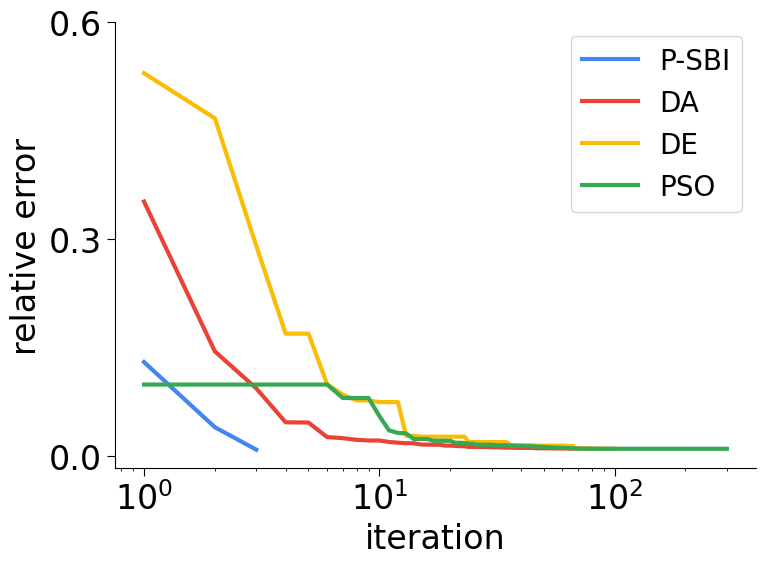

In [24]:
# Plot the y_history for all three algorithms
plt.figure(figsize=(8, 6))


border_colors = ['#4285F4', '#EA4335', '#FBBC05', '#34A853']

real_data   = [1,2,3]
SBI_history = [0.13, 0.04, 0.009]

algo_list = [da_history, cum_min, pso_history]
len_data = [np.linspace(1, len(algo_list[i]), len(algo_list[i])) for i in range(3)]

# plt.plot(np.log10(real_data), SBI_history,   label='P-SBI', color= border_colors[0])
# plt.plot(np.log10(len_data[0]), da_history,  label='DA',  color= border_colors[1])
# plt.plot(np.log10(len_data[1]), cum_min,     label='DE',  color= border_colors[2])
# plt.plot(np.log10(len_data[2]), pso_history, label='PSO', color= border_colors[3])
plt.plot(real_data, SBI_history,   label='P-SBI', color= border_colors[0])
plt.plot(len_data[0], da_history + 0.009126,  label='DA',  color= border_colors[1])
plt.plot(len_data[1], cum_min + 0.00678,     label='DE',  color= border_colors[2])
plt.plot(len_data[2], pso_history + 0.01, label='PSO', color= border_colors[3])


# plt.title('Comparison of Y_history for DA, PSO, and DE Algorithms')
plt.xlabel(r'iteration')
plt.ylabel(r'relative error')
plt.legend(fontsize=20)
# plt.xlim(0,2.2)
plt.xscale('log') 
# plt.xticks([0, 1, 2])
plt.yticks([0, 0.3, 0.6])
# plt.grid(True)
plt.tight_layout()
plt.savefig('Figure/Algo3_comparison.svg',dpi=300)
# Display the plot
plt.show()

In [7]:
SBI_history[-1]

0.009

In [17]:
print(0.01 - da_history[-1]) 
print(0.01 - cum_min[-1])
print(0.01 - pso_history[-1])

0.009126336595832103
0.0067809739875050335
0.009815208026001079


In [18]:
pso_history[-1]

0.000184791973998921